In [ ]:
import numpy as np
import networkx

from matplotlib import pyplot as plt
import scipy
from math import factorial

In [ ]:
EPS = 0.0001
G = networkx.DiGraph()

In [ ]:
G.add_nodes_from(np.arange(1,7))

In [4]:
V = np.array(G.nodes)
V

array([1, 2, 3, 4, 5, 6])

In [5]:
G.add_edge(1,4)
G.add_edge(4,1)
G.add_edge(1,2)
G.add_edge(2,1)
G.add_edge(1,3)
G.add_edge(3,1)
G.add_edge(2,3)
G.add_edge(3,2)
G.add_edge(3,6)
G.add_edge(6,3)
G.add_edge(3,5)
G.add_edge(5,3)
G.add_edge(5,6)
G.add_edge(6,5)

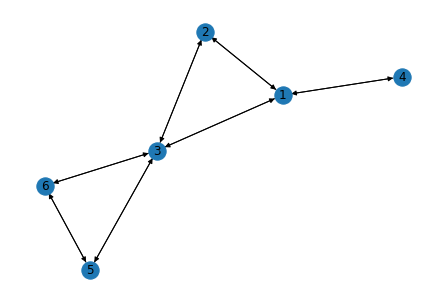

In [77]:
networkx.draw(G, with_labels = True, pos=networkx.spring_layout(G))

In [6]:
A = networkx.adjacency_matrix(G).A
A

array([[0, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0]], dtype=int32)

### matrix expontatial

In [8]:
A @ A

array([[3, 1, 1, 0, 1, 1],
       [1, 2, 1, 1, 1, 1],
       [1, 1, 4, 1, 1, 1],
       [0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 2, 1],
       [1, 1, 1, 0, 1, 2]], dtype=int32)

In [9]:
np.linalg.matrix_power(A,0)

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int32)

In [11]:
X = np.ones((A.shape[0],2))
gamma = +1

In [12]:
Z = scipy.linalg.expm(A*gamma)
Z

array([[3.68976161, 2.81466568, 3.40253116, 1.73948866, 1.43245364,
        1.43245364],
       [2.81466568, 2.97186122, 3.1719423 , 0.94848924, 1.36910975,
        1.36910975],
       [3.40253116, 3.1719423 , 5.12221525, 1.07517701, 3.10859842,
        3.10859842],
       [1.73948866, 0.94848924, 1.07517701, 1.66609536, 0.35727663,
        0.35727663],
       [1.43245364, 1.36910975, 3.10859842, 0.35727663, 2.89856486,
        2.53068542],
       [1.43245364, 1.36910975, 3.10859842, 0.35727663, 2.53068542,
        2.89856486]])

In [14]:
for i in range(20):
    if i == 0:
        Z = np.linalg.matrix_power(A*gamma,i)/factorial(i)
    else:
        Z += np.linalg.matrix_power(A*gamma,i)/factorial(i)
Z

array([[3.68976161, 2.81466568, 3.40253116, 1.73948866, 1.43245364,
        1.43245364],
       [2.81466568, 2.97186122, 3.1719423 , 0.94848924, 1.36910975,
        1.36910975],
       [3.40253116, 3.1719423 , 5.12221525, 1.07517701, 3.10859842,
        3.10859842],
       [1.73948866, 0.94848924, 1.07517701, 1.66609536, 0.35727663,
        0.35727663],
       [1.43245364, 1.36910975, 3.10859842, 0.35727663, 2.89856486,
        2.53068542],
       [1.43245364, 1.36910975, 3.10859842, 0.35727663, 2.53068542,
        2.89856486]])

In [19]:
A

array([[0, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0]], dtype=int32)

In [18]:
scipy.linalg.expm(-1*A*gamma) @ X

array([[-0.36083845, -0.36083845],
       [ 1.06447144,  1.06447144],
       [-1.13921476, -1.13921476],
       [ 0.84553027,  0.84553027],
       [ 0.60759386,  0.60759386],
       [ 0.60759386,  0.60759386]])

### columns of feature scales with the relating of original features

In [34]:
X = np.concatenate([np.ones((A.shape[0],1)),2*np.ones((A.shape[0],1))], axis=1)
X1 = np.ones((A.shape[0],2))

In [33]:
A @ X

array([[3., 6.],
       [2., 4.],
       [4., 8.],
       [1., 2.],
       [2., 4.],
       [2., 4.]])

In [35]:
A @ X1

array([[3., 3.],
       [2., 2.],
       [4., 4.],
       [1., 1.],
       [2., 2.],
       [2., 2.]])

In [ ]:
a

### Radial basis function kernel
### $\exp(-\gamma \times D^{2})X$
### $\gamma = \frac{1}{2\sigma^{2}}$
### $D^{2}$ : squared distance matrix

In [42]:
gamma=0.0001

In [45]:
scipy.linalg.expm(-(A**2)*gamma) @ X

array([[0.99970003, 1.99940007],
       [0.99980003, 1.99960007],
       [0.99960004, 1.99920009],
       [0.99990001, 1.99980003],
       [0.99980003, 1.99960006],
       [0.99980003, 1.99960006]])

In [46]:
scipy.linalg.expm((A**2)*gamma) @ X

array([[1.00030004, 2.00060007],
       [1.00020004, 2.00040007],
       [1.00040005, 2.00080009],
       [1.00010002, 2.00020003],
       [1.00020003, 2.00040006],
       [1.00020003, 2.00040006]])

In [41]:
A

array([[0, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0]], dtype=int32)

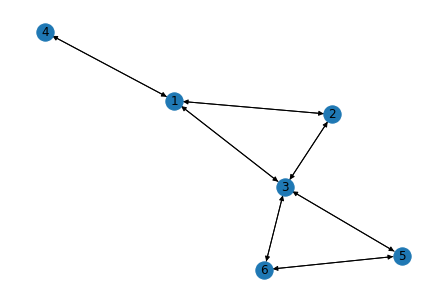

In [80]:
networkx.draw(G, with_labels = True)

In [48]:
gamma=1

In [96]:
K = scipy.linalg.expm(-(A**2)*gamma) @ X
(K - K.min(axis=0))/(K.max(axis=0) - K.min(axis=0))

array([[0.35321558, 0.35321558],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.90064776, 0.90064776],
       [0.79267576, 0.79267576],
       [0.79267576, 0.79267576]])

In [92]:
K = np.linalg.inv(scipy.linalg.expm((A**2)*gamma)) @ X
(K - K.min(axis=0))/(K.max(axis=0) - K.min(axis=0))

array([[0.35321558, 0.35321558],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.90064776, 0.90064776],
       [0.79267576, 0.79267576],
       [0.79267576, 0.79267576]])

In [95]:
# not right
K = scipy.linalg.expm(np.linalg.inv(A**2)*gamma) @ X
(K - K.min(axis=0))/(K.max(axis=0) - K.min(axis=0))

array([[0.50538736, 0.50538736],
       [0.        , 0.        ],
       [0.28541386, 0.28541386],
       [1.        , 1.        ],
       [0.58688938, 0.58688938],
       [0.58688938, 0.58688938]])

similarity

In [87]:
K = scipy.linalg.expm(A*gamma) @ X
(K - K.min(axis=0))/(K.max(axis=0) - K.min(axis=0))

array([[0.65141161, 0.65141161],
       [0.50613027, 0.50613027],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.43229063, 0.43229063],
       [0.43229063, 0.43229063]])